In [153]:
import pandas as pd
# Reshape the input data to include the timestep and feature dimensions
import tensorflow as tf

from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, ReLU
from keras.activations import relu, sigmoid, tanh
from keras.optimizers import Nadam

In [107]:
import pandas as pd
import glob
import numpy as np
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [160]:
data = pd.read_csv("/home/ashmitha/Downloads/NZdatabase_flatfile_FAS_horizontal_GeoMean.csv")

In [161]:
data.shape

(4266, 350)

In [162]:
for i in range(125, 225):
    metadata = data[data.iloc[:, i] == -99999].index
    data.drop(index=metadata, inplace=True)

print(data.shape)


(3312, 350)


In [165]:
metadata_1 = data[data["Rrup_km"] == 0].index
data.drop(index=metadata_1, inplace=True)

metadata_2 = data[data["Rjb_km"] == 0].index
data.drop(index=metadata_2, inplace=True)

In [166]:
print(data.shape)


(3305, 350)


In [167]:
data = data.dropna()


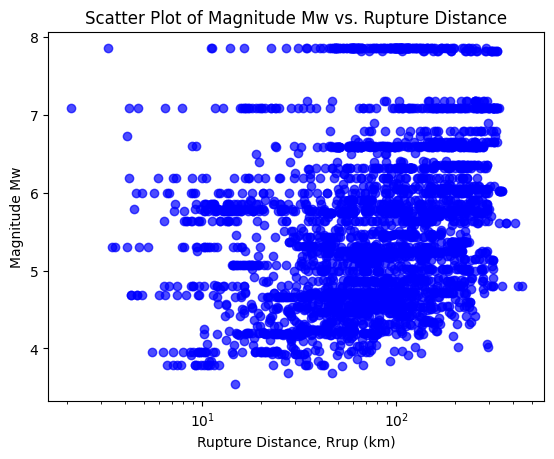

In [339]:
# scatter plot Magnitude Mw vs Hypocentral Distance R (km)
plt.scatter(data["Rrup_km"], data["Mw"], color='blue', alpha=0.7)

plt.xlabel('Rupture Distance, Rrup (km)')
plt.ylabel('Magnitude Mw')

plt.xscale('log')
plt.title('Scatter Plot of Magnitude Mw vs. Rupture Distance')

plt.show()

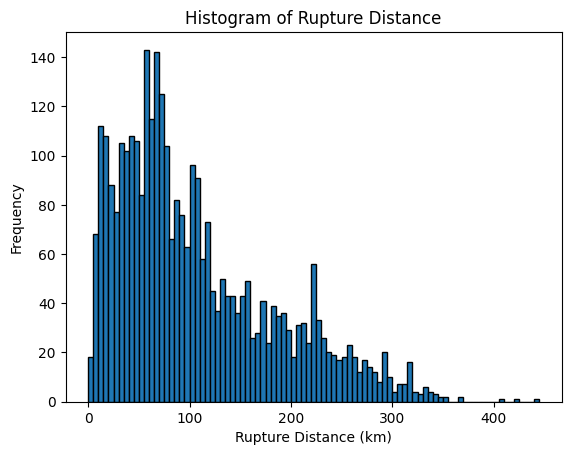

In [340]:
#Histogram of number of earthquake vs Depth (km)
bin_size = 5
plt.hist(data["Rrup_km"], bins=range(0, int(max(data["Rrup_km"])) + bin_size, bin_size), edgecolor='black')

plt.xlabel('Rupture Distance (km)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Rupture Distance')

plt.show()

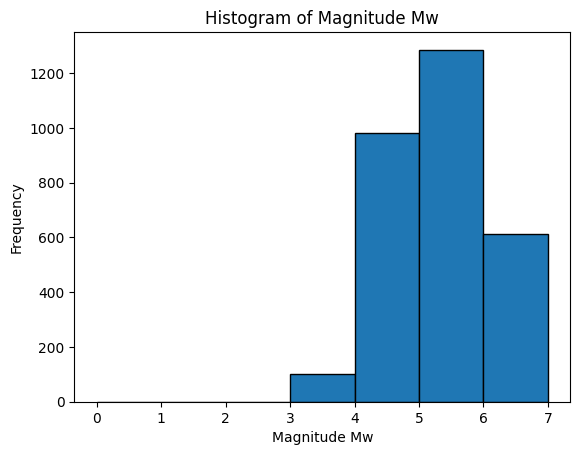

In [345]:
#Histogram of number of earthquake vs Magnitude
bin_size = 1
plt.hist(data["Mw"], bins=range(0, int(max(data["Mw"])) + bin_size, bin_size), edgecolor='black')


plt.xlabel('Magnitude Mw')
plt.ylabel('Frequency')
plt.title(f'Histogram of Magnitude Mw')

plt.show()

In [168]:
input_data = data[["Vs30", "Rjb_km", "Rrup_km", "Mw"]]
input_data["Rjb_km"] = np.log(input_data["Rjb_km"])
input_data["Rrup_km"] = np.log(input_data["Rrup_km"])
input_data = np.array(input_data)

/tmp/ipykernel_375129/1635604779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data["Rjb_km"] = np.log(input_data["Rjb_km"])
/tmp/ipykernel_375129/1635604779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data["Rrup_km"] = np.log(input_data["Rrup_km"])


In [169]:
output_data = data.iloc[:, 125:225]
output_data = np.log(output_data)
output_data = np.array(output_data)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=1)


In [148]:
X_train.shape

(2649, 4)

In [149]:
y_train.shape

(2649, 100)

In [189]:
import matplotlib.pyplot as plt

In [192]:
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential([
    # LSTM(8, activation=ReLU(alpha=0.01)),
    LSTM(8, activation="tanh"),
    Dense(100)  # Adjusted to have 1 unit to match the shape of the target data
])


# Define the optimizer with the desired learning rate
optimizer = Nadam(learning_rate=0.002)  # Adjust the learning rate as needed

# Compile the model with the specified optimizer and loss function
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber())

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=350, batch_size=50, verbose=1)




# Evaluate the model on the test set
y_train_pred = model.predict(X_train_reshaped)
y_test_pred = model.predict(X_test_reshaped)


Epoch 1/350
53/53 [==============================] - 2s 3ms/step - loss: 5.5918
Epoch 2/350
53/53 [==============================] - 0s 2ms/step - loss: 5.1707
Epoch 3/350
53/53 [==============================] - 0s 2ms/step - loss: 4.7420
Epoch 4/350
53/53 [==============================] - 0s 2ms/step - loss: 4.3148
Epoch 5/350
53/53 [==============================] - 0s 2ms/step - loss: 3.8916
Epoch 6/350
53/53 [==============================] - 0s 2ms/step - loss: 3.4766
Epoch 7/350
53/53 [==============================] - 0s 2ms/step - loss: 3.0770
Epoch 8/350
53/53 [==============================] - 0s 2ms/step - loss: 2.7015
Epoch 9/350
53/53 [==============================] - 0s 3ms/step - loss: 2.3586
Epoch 10/350
53/53 [==============================] - 0s 3ms/step - loss: 2.0560
Epoch 11/350
53/53 [==============================] - 0s 2ms/step - loss: 1.7986
Epoch 12/350
53/53 [==============================] - 0s 3ms/step - loss: 1.5881
Epoch 13/350
53/53 [=================

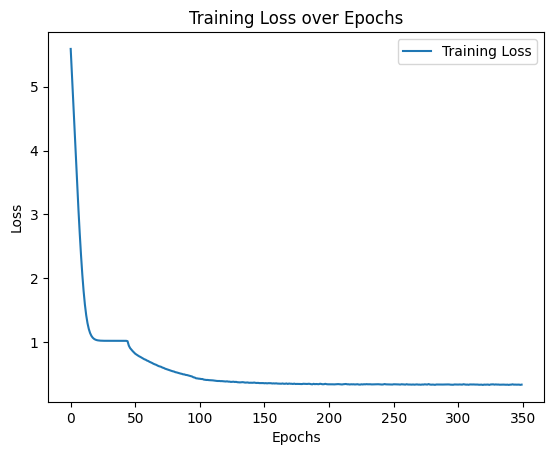

In [229]:
training_loss = history.history['loss']

# Plot the training loss
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

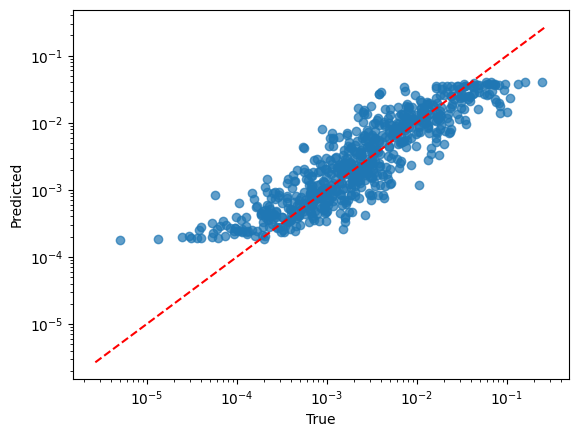

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_test_pred are arrays
plt.scatter(np.exp(y_test[:, 50]), np.exp(y_test_pred[:, 50]), label='Testing Set', alpha=0.7)

# Compute the minimum and maximum values of y_test
min_y_test = np.min(np.exp(y_test))
max_y_test = np.max(np.exp(y_test))

# Plot the ideal fit line
plt.plot([min_y_test, max_y_test], [min_y_test, max_y_test], linestyle='--', color='red', label='Ideal Fit')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.xscale('log')
plt.yscale('log')

In [197]:
from sklearn.metrics import r2_score

# Assuming you have already trained your model and made predictions
# y_train_pred, y_val_pred, y_test_pred contain predictions made by your model

# Calculate R-squared for training, validation, and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R-squared for Training Set: {r2_train:.3f}')
print(f'R-squared for Testing Set: {r2_test:.3f}')



R-squared for Training Set: 0.746
R-squared for Testing Set: 0.753


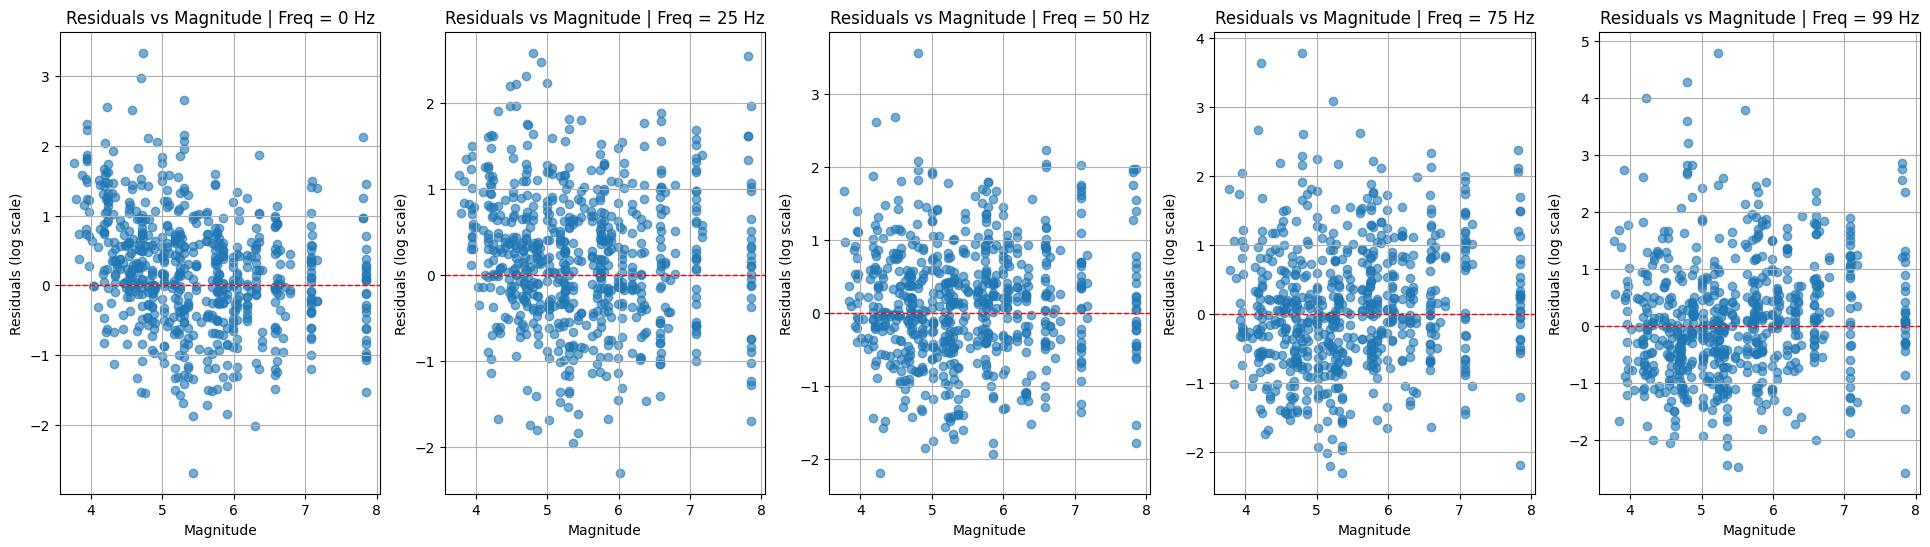

In [199]:
magnitude = X_test[:, 3]

fig, axs = plt.subplots(1, 5, figsize=(24, 6))

for i, freq in enumerate([0, 25, 50, 75, 99]):
    residuals = y_test_pred[:, freq] - y_test[:, freq] 

    # Plot 1
    axs[i].scatter(magnitude, residuals, alpha=0.6)
    axs[i].axhline(y=0, color='red', linestyle='--', linewidth=1)
    axs[i].set_xlabel('Magnitude')
    axs[i].set_ylabel('Residuals (log scale)')
    axs[i].set_title(f'Residuals vs Magnitude | Freq = {freq} Hz')
    axs[i].grid(True)

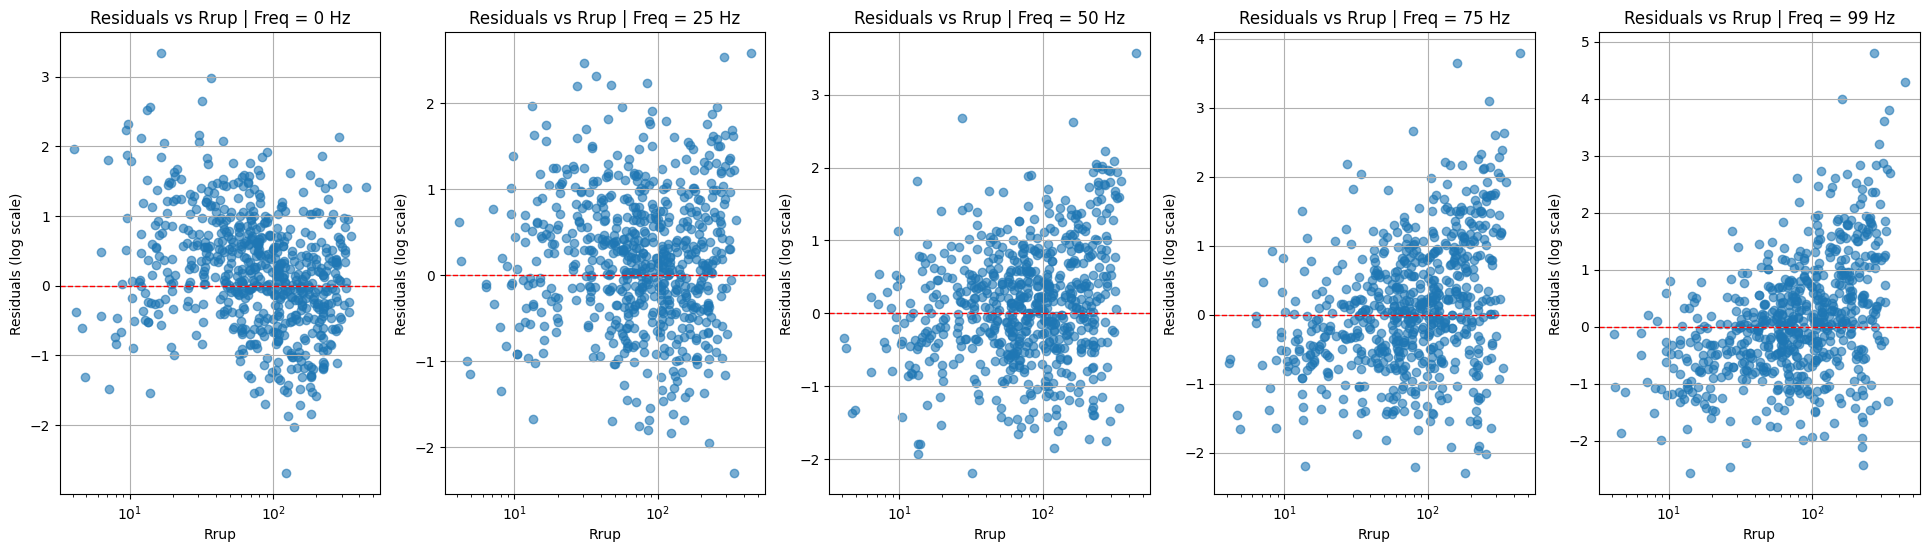

In [205]:
rrup = np.exp(X_test[:, 2])

fig, axs = plt.subplots(1, 5, figsize=(24, 6))

for i, freq in enumerate([0, 25, 50, 75, 99]):
    residuals = y_test_pred[:, freq] - y_test[:, freq] 

    # Plot 1
    axs[i].scatter(rrup, residuals, alpha=0.6)
    axs[i].axhline(y=0, color='red', linestyle='--', linewidth=1)
    axs[i].set_xlabel('Rrup')
    axs[i].set_ylabel('Residuals (log scale)')
    axs[i].set_title(f'Residuals vs Rrup | Freq = {freq} Hz')
    axs[i].set_xscale("log")
    axs[i].grid(True)

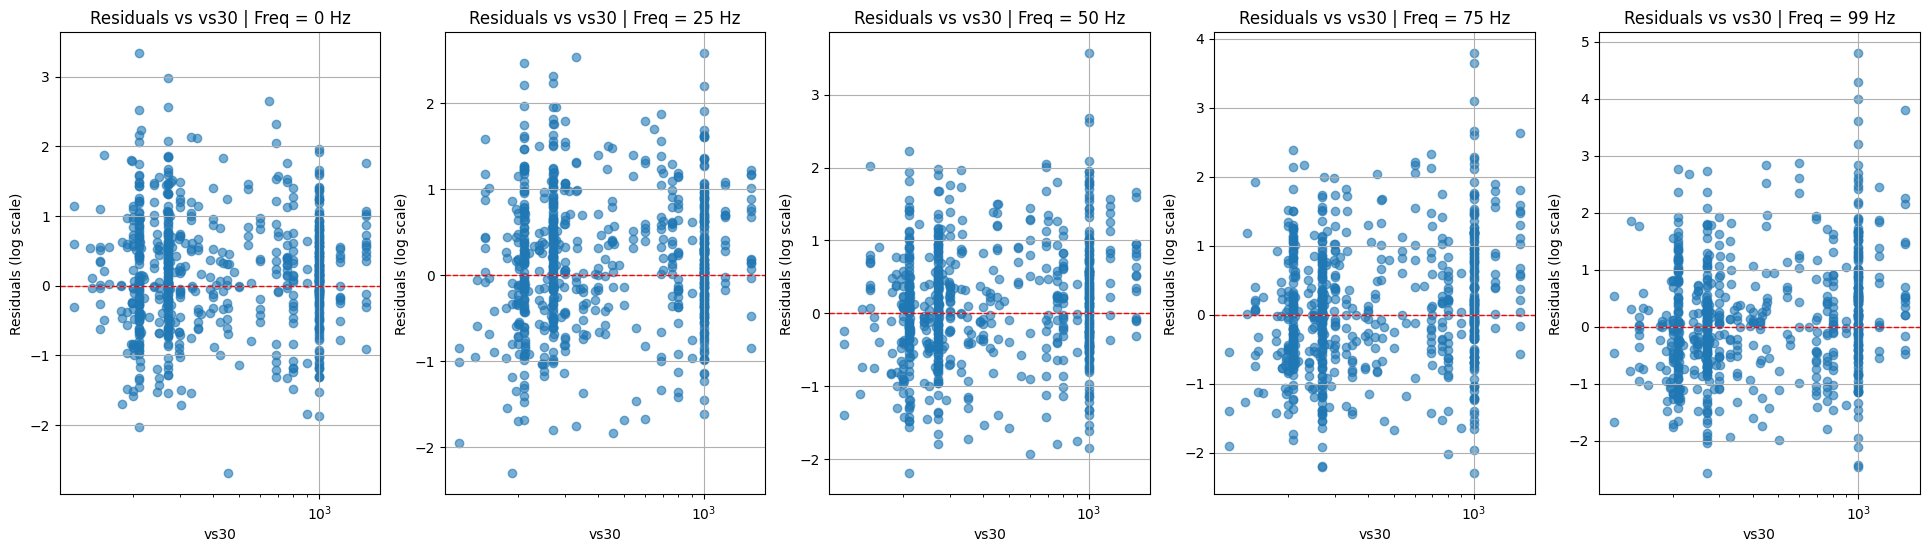

In [207]:
vs30 = X_test[:, 0]

fig, axs = plt.subplots(1, 5, figsize=(24, 6))

for i, freq in enumerate([0, 25, 50, 75, 99]):
    residuals = y_test_pred[:, freq] - y_test[:, freq] 

    # Plot 1
    axs[i].scatter(vs30, residuals, alpha=0.6)
    axs[i].axhline(y=0, color='red', linestyle='--', linewidth=1)
    axs[i].set_xlabel('vs30')
    axs[i].set_ylabel('Residuals (log scale)')
    axs[i].set_title(f'Residuals vs vs30 | Freq = {freq} Hz')
    axs[i].set_xscale("log")
    axs[i].grid(True)

In [227]:
Mw_range = [(3.5, 4), (4, 4.5)]
R_range = [(0, 50), (50, 100), (100, 150), (150, 200)]

In [208]:
X= input_data
y= output_data

In [224]:
np.max(np.exp(X[:, 2]))

443.37000000000006

1/1 [==============================] - 0s 23ms/step


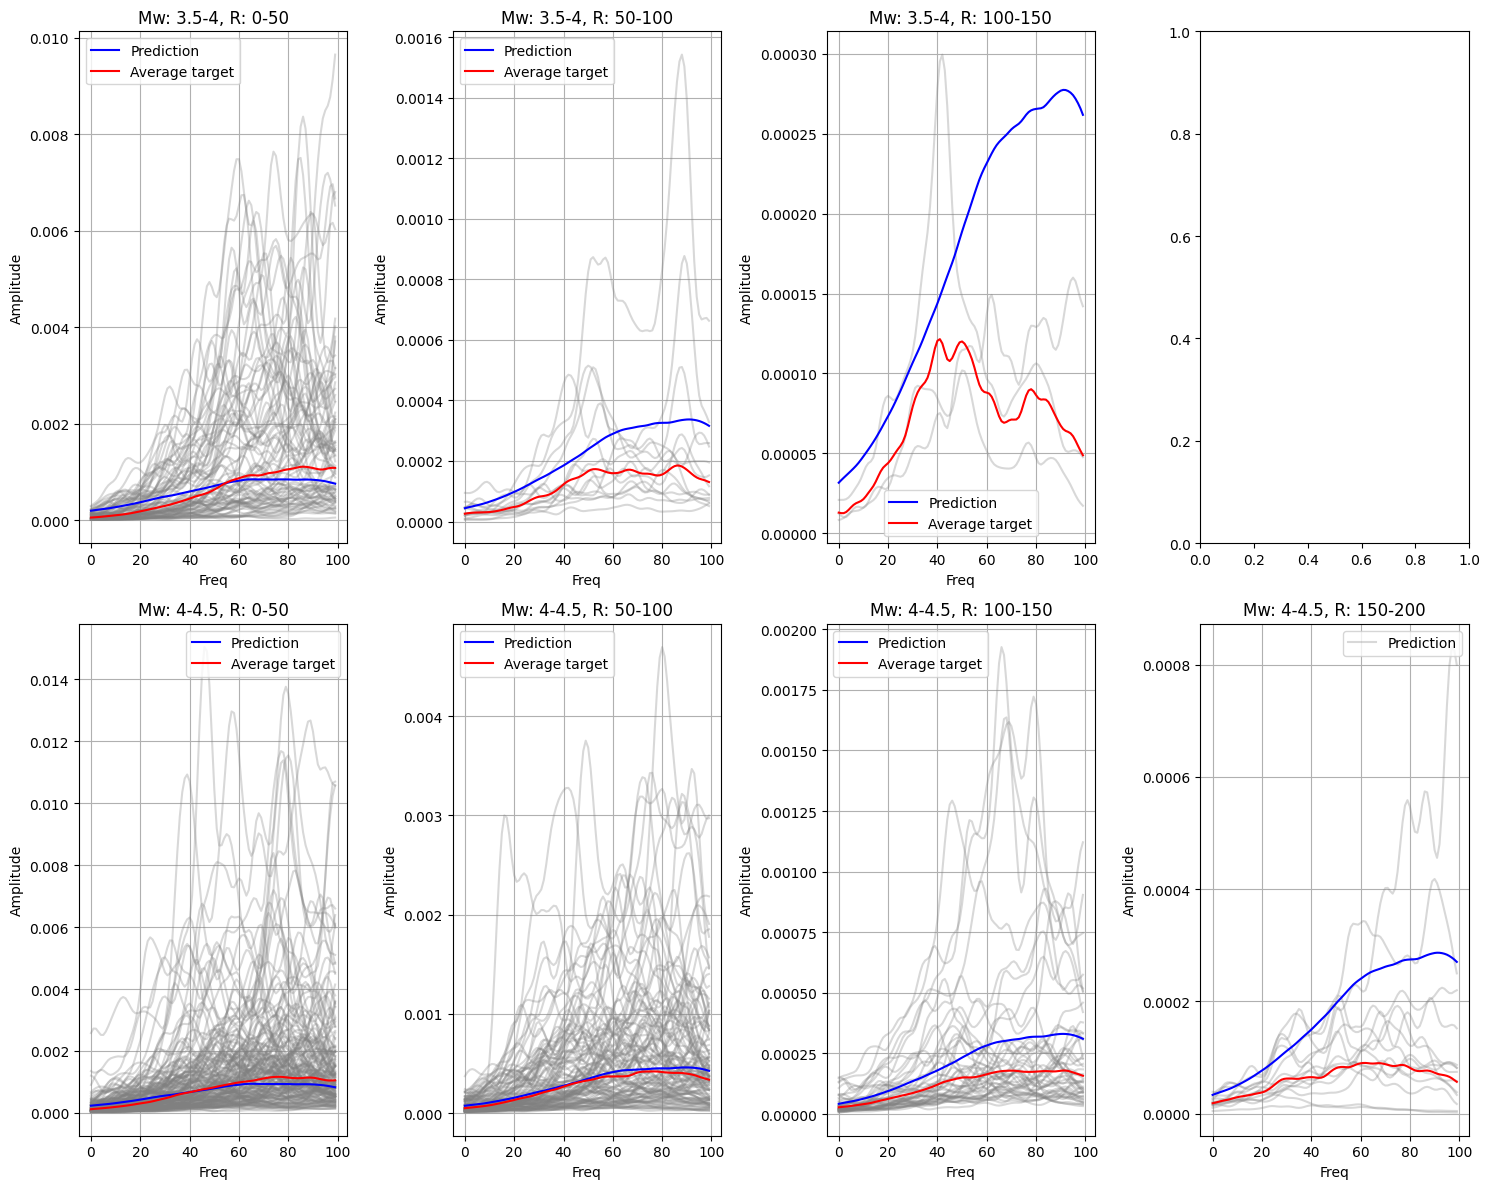

In [228]:
fig, axs = plt.subplots(len(Mw_range), len(R_range), figsize=(15, 12))

# Loop over Mw ranges
for i, (Mw_start, Mw_end) in enumerate(Mw_range):
    # Loop over R ranges
    for j, (R_start, R_end) in enumerate(R_range):
        # Filter the data based on the current range
        X_subset = X[(X[:, 3] >= Mw_start) & (X[:, 3] < Mw_end) & (np.exp(X[:, 2]) >= R_start) & (np.exp(X[:, 2]) < R_end)]
        y_subset = y[(X[:, 3] >= Mw_start) & (X[:, 3] < Mw_end) & (np.exp(X[:, 2]) >= R_start) & (np.exp(X[:, 2]) < R_end)]

        if X_subset.shape[0] == 0:
            continue
        
        # Predict the target values
        X_subset = X_subset.reshape(X_subset.shape[0], 1, X_subset.shape[1])
        y_pred = model.predict(X_subset)

        
        for k in range(len(y_pred)):
            # axs[i, j].plot(np.exp(y_subset.iloc[i, :]), label='actual', color='red')
            axs[i, j].plot(np.exp(y_subset[k,:]), label=None, color='grey', alpha = 0.3)
        
        X_avg = np.average(X_subset, axis = 0)
        X_avg = np.expand_dims(X_avg, axis = 0)

        y_avg = np.average(y_subset, axis = 0)

        y_pred = model.predict(X_avg)
        y_pred = np.array(np.exp(y_pred))
        axs[i, j].plot(y_pred.flatten(), label=f'Prediction', color='blue')
        axs[i, j].plot(np.exp(y_avg), label = f"Average target", color="red")

        
        axs[i, j].set_xlabel('Freq')
        axs[i, j].set_ylabel('Amplitude')
        axs[i, j].set_title(f'Mw: {Mw_start}-{Mw_end}, R: {R_start}-{R_end}')
        axs[i, j].legend()
        axs[i, j].grid(True)

    dummy_line = plt.Line2D([], [], color='grey', alpha=0.3, label='Prediction')
    plt.legend(handles=[dummy_line], loc='upper right')


        
     

# Adjust layout
plt.tight_layout()
plt.show()

VAE

In [306]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K 
from keras.losses import mse
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mean_squared_error as mse
from tensorflow.keras import backend as K

In [303]:
X_reshaped = X.reshape(X.shape[0], 1, X.shape[1])


In [304]:
X_vae = model.predict(X_reshaped)

  1/104 [..............................] - ETA: 1s

104/104 [==============================] - 0s 955us/step


In [307]:
X_vae_train, X_vae_test, X_train, X_test, y_train, y_test = train_test_split(X_vae, X, y, test_size=0.2, random_state=1)

In [323]:
def sampling(args):
    """Reparameterization trick by sampling from a normal distribution."""
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

def vae_loss(input_layer, output_layer, z_log_var, z_mean, beta=0.1):
    """Calculate VAE loss as a combination of KL divergence and reconstruction loss."""
    reconstruction_loss = mse(K.flatten(input_layer), K.flatten(output_layer))
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(reconstruction_loss + beta * kl_loss)

def build_vae(input_dim, latent_dim, layers_dims):
    """Builds the VAE model using specified dimensions."""
    input_layer = Input(shape=(input_dim,))
    x = input_layer
    for dim in layers_dims['encoder']:
        x = Dense(dim, activation='relu')(x)
    
    z_mean = Dense(latent_dim)(x)
    z_log_var = Dense(latent_dim)(x)
    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
    
    decoder_input = z
    for dim in reversed(layers_dims['encoder']):
        decoder_input = Dense(dim, activation='relu')(decoder_input)
    output_layer = Dense(input_dim, name='decoder_output')(decoder_input)
    
    vae = Model(inputs=input_layer, outputs=output_layer)
    vae.add_loss(vae_loss(input_layer, output_layer, z_log_var, z_mean))
    
    return vae

# Define dimensions for VAE layers
layers_dims = {
    'encoder': [100, 15, 10, 6]  # Specify the dimensions for encoder layers
}

# Initialize VAE
input_dim = X_vae.shape[1]  # Assuming X_vae is predefined
latent_dim = 3
vae = build_vae(input_dim, latent_dim, layers_dims)

# Compile VAE
vae.compile(optimizer='adam', loss=None, metrics=['mse'])
vae.summary()


Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 dense_242 (Dense)           (None, 100)                  10100     ['input_24[0][0]']            
                                                                                                  
 dense_243 (Dense)           (None, 15)                   1515      ['dense_242[0][0]']           
                                                                                                  
 dense_244 (Dense)           (None, 10)                   160       ['dense_243[0][0]']           
                                                                                           

In [330]:
history = vae.fit(X_vae_train, y_train, epochs=200, batch_size=32, verbose=1)

Epoch 1/100


83/83 [==============================] - 0s 3ms/step - loss: 0.2554 - mse: 0.8489
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2559 - mse: 0.8540
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2609 - mse: 0.8630
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2573 - mse: 0.8440
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2601 - mse: 0.8362
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.2535 - mse: 0.8449
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.2554 - mse: 0.8478
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.2618 - mse: 0.8573
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.2508 - mse: 0.8401
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.2550 - mse: 0.8409
Epoch 11/100
83/83 [==============================] - 0s 1ms/step - los

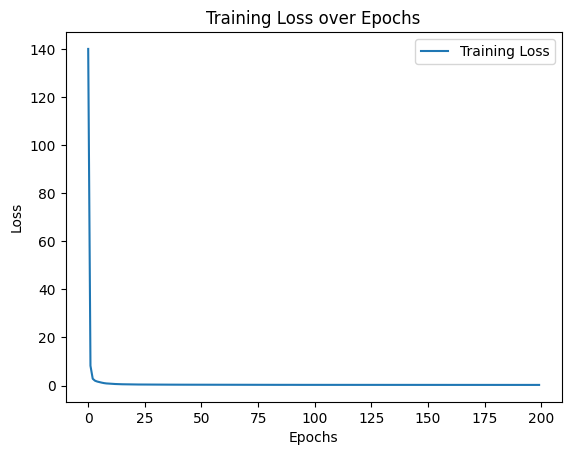

In [325]:
training_loss = history.history['loss']

# Plot the training loss
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [326]:
y_vae_pred_test = vae.predict(X_vae_test)
y_vae_pred_train = vae.predict(X_vae_train)


83/83 [==============================] - 0s 785us/step


In [327]:
from sklearn.metrics import r2_score

# Assuming you have already trained your model and made predictions
# y_train_pred, y_val_pred, y_test_pred contain predictions made by your model

# Calculate R-squared for training, validation, and testing sets
r2_train = r2_score(y_train, y_vae_pred_train)
r2_test = r2_score(y_test, y_vae_pred_test)

# r2_test = r2_score(y_test, y_test_pred)

print(f'R-squared for Training Set: {r2_train:.3f}')
print(f'R-squared for Testing Set: {r2_test:.3f}')



R-squared for Training Set: 0.699
R-squared for Testing Set: 0.704


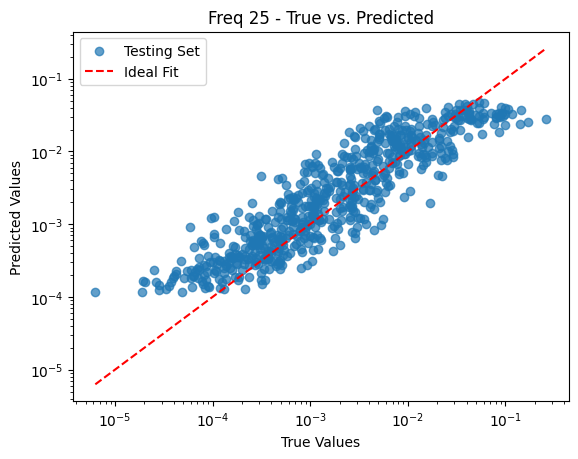

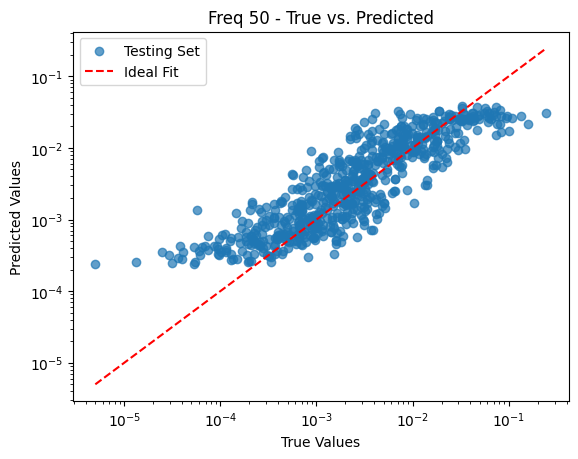

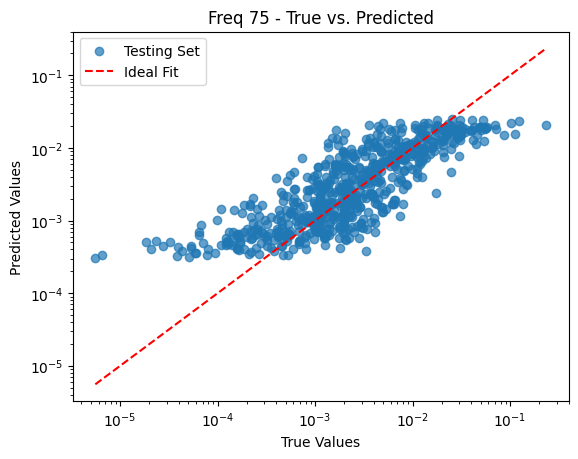

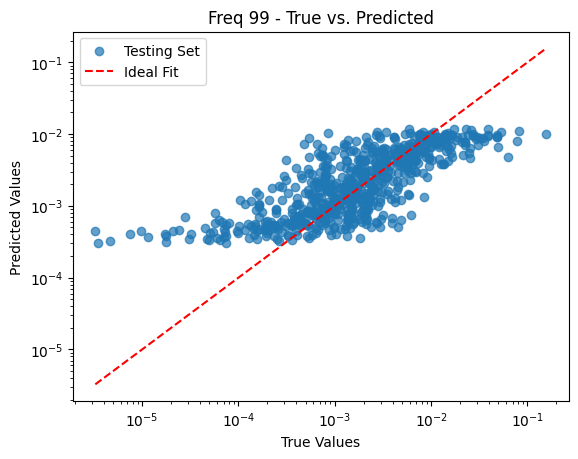

In [329]:
import matplotlib.pyplot as plt
import numpy as np

indices = [25, 50, 75, 99]

for idx in indices:
    plt.figure()  # Create a new figure for each plot
    plt.scatter(np.exp(y_test[:, idx]), np.exp(y_vae_pred_test[:, idx]), label='Testing Set', alpha=0.7)

    # Compute the minimum and maximum values for each index
    min_y_test = np.min(np.exp(y_test[:, idx]))
    max_y_test = np.max(np.exp(y_test[:, idx]))

    # Plot the ideal fit line
    plt.plot([min_y_test, max_y_test], [min_y_test, max_y_test], linestyle='--', color='red', label='Ideal Fit')
    
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"Freq {idx} - True vs. Predicted")
    plt.legend()
    plt.show()


In [332]:
residuals = y_test[:, freq] - y_vae_pred_test[:, freq]


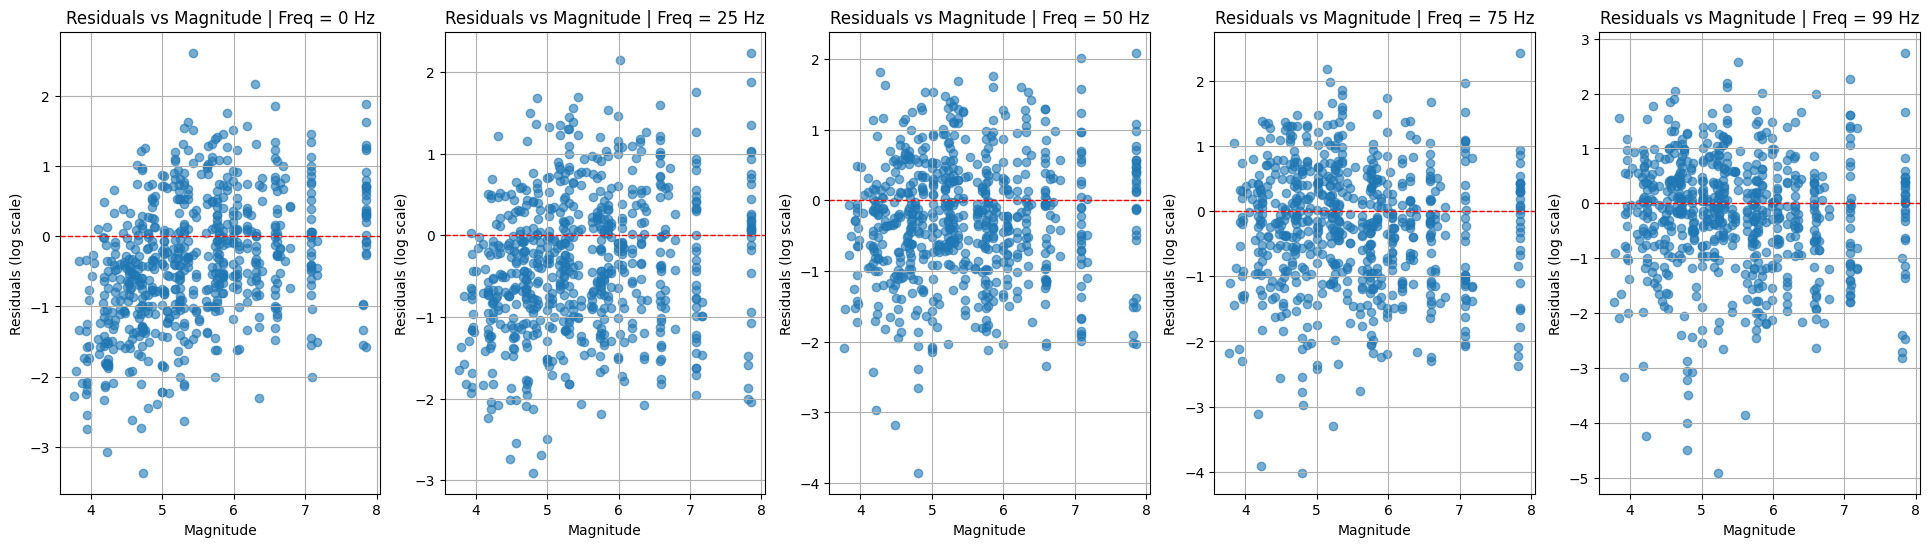

In [331]:
magnitude = X_test[:, 3]

fig, axs = plt.subplots(1, 5, figsize=(24, 6))

for i, freq in enumerate([0, 25, 50, 75, 99]):

    # Plot 1
    axs[i].scatter(magnitude, residuals, alpha=0.6)
    axs[i].axhline(y=0, color='red', linestyle='--', linewidth=1)
    axs[i].set_xlabel('Magnitude')
    axs[i].set_ylabel('Residuals (log scale)')
    axs[i].set_title(f'Residuals vs Magnitude | Freq = {freq} Hz')
    axs[i].grid(True)

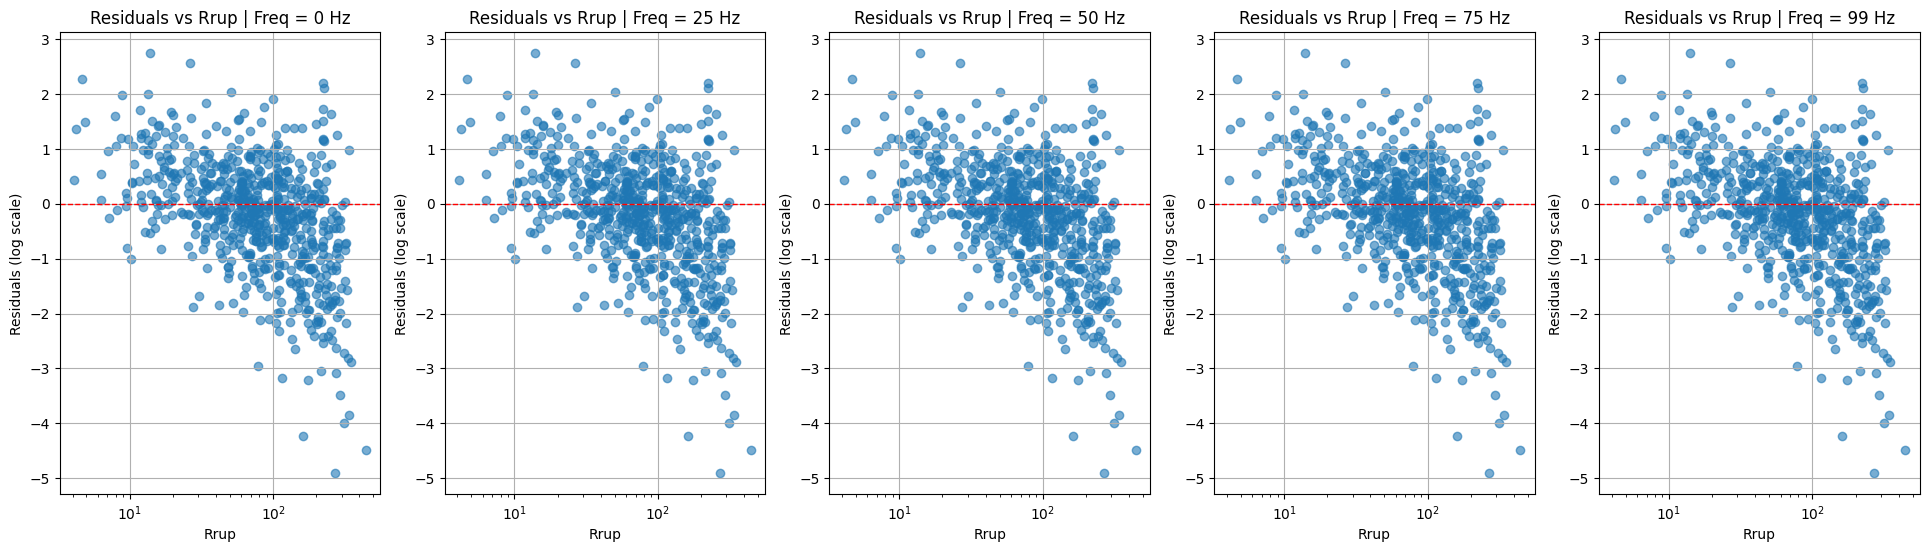

In [333]:
rrup = np.exp(X_test[:, 2])

fig, axs = plt.subplots(1, 5, figsize=(24, 6))

for i, freq in enumerate([0, 25, 50, 75, 99]):

    # Plot 1
    axs[i].scatter(rrup, residuals, alpha=0.6)
    axs[i].axhline(y=0, color='red', linestyle='--', linewidth=1)
    axs[i].set_xlabel('Rrup')
    axs[i].set_ylabel('Residuals (log scale)')
    axs[i].set_title(f'Residuals vs Rrup | Freq = {freq} Hz')
    axs[i].set_xscale("log")
    axs[i].grid(True)

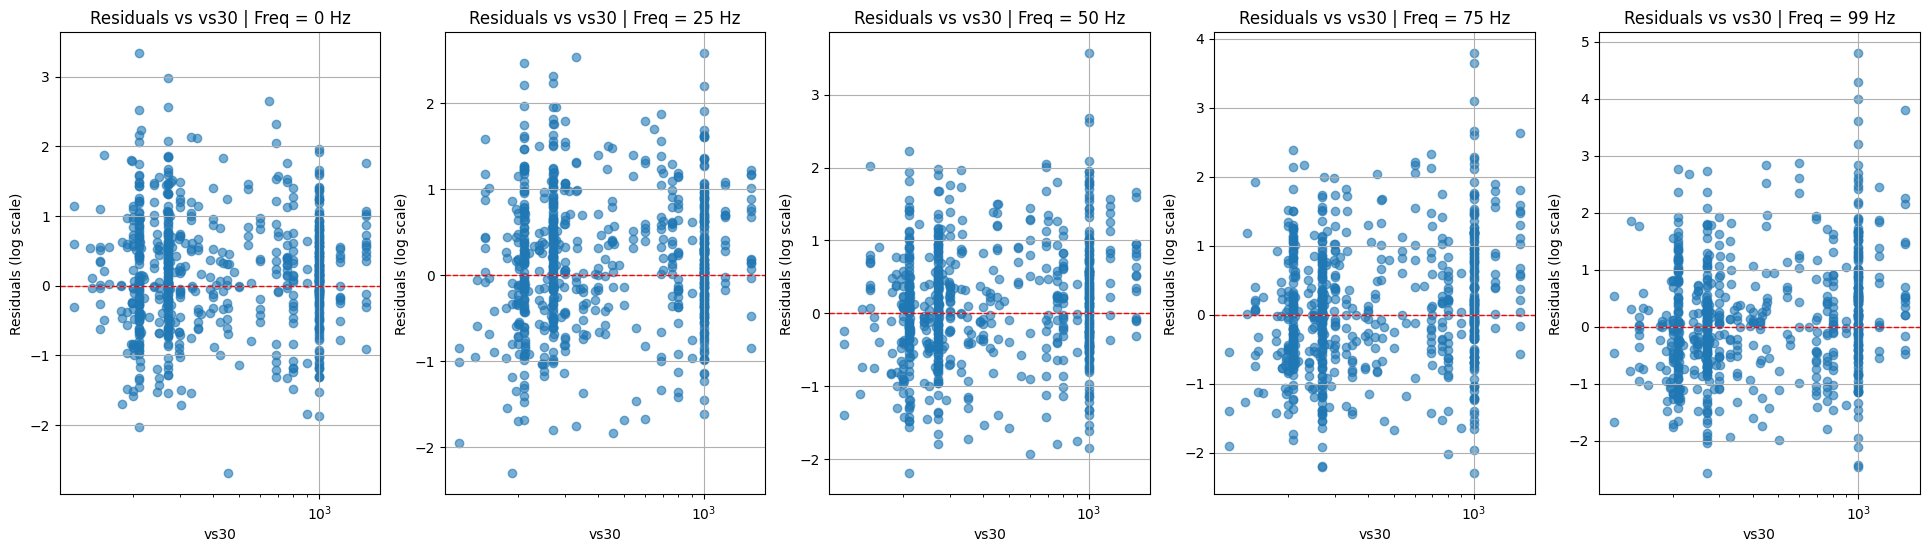

In [334]:
vs30 = X_test[:, 0]

fig, axs = plt.subplots(1, 5, figsize=(24, 6))

for i, freq in enumerate([0, 25, 50, 75, 99]):
    residuals = y_test_pred[:, freq] - y_test[:, freq] 

    # Plot 1
    axs[i].scatter(vs30, residuals, alpha=0.6)
    axs[i].axhline(y=0, color='red', linestyle='--', linewidth=1)
    axs[i].set_xlabel('vs30')
    axs[i].set_ylabel('Residuals (log scale)')
    axs[i].set_title(f'Residuals vs vs30 | Freq = {freq} Hz')
    axs[i].set_xscale("log")
    axs[i].grid(True)

1/1 [==============================] - 0s 21ms/step


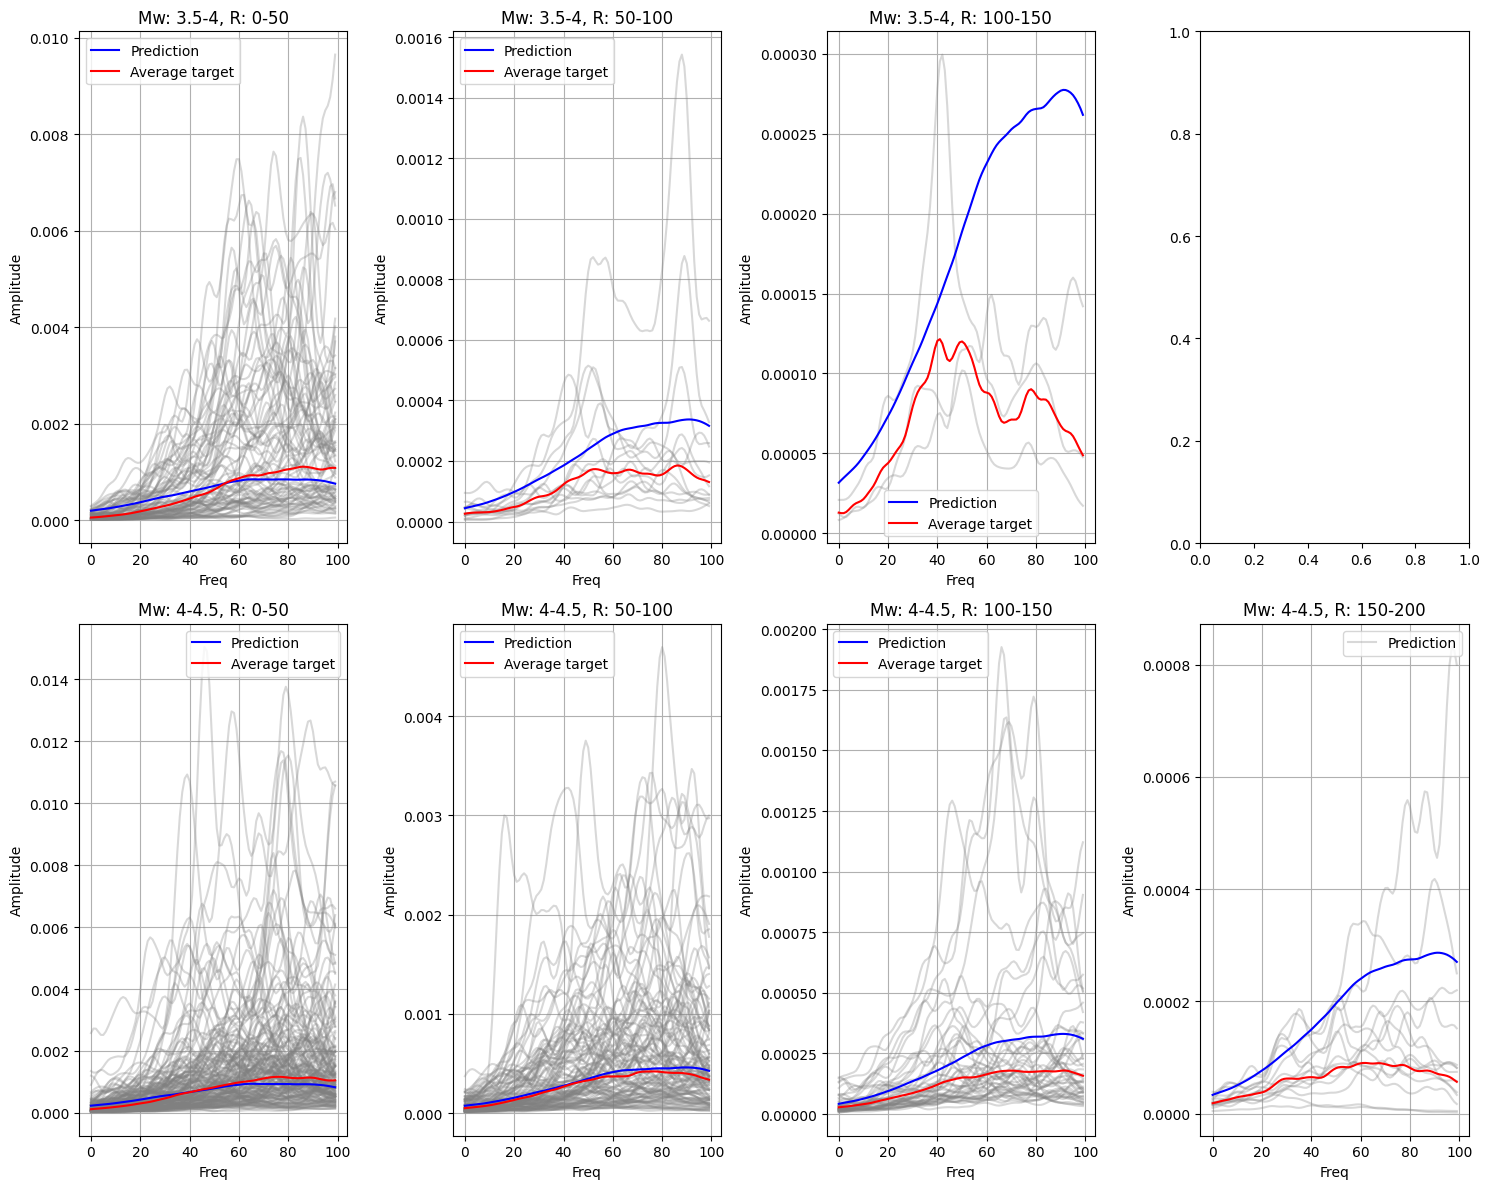

In [335]:
fig, axs = plt.subplots(len(Mw_range), len(R_range), figsize=(15, 12))

# Loop over Mw ranges
for i, (Mw_start, Mw_end) in enumerate(Mw_range):
    # Loop over R ranges
    for j, (R_start, R_end) in enumerate(R_range):
        # Filter the data based on the current range
        X_subset = X[(X[:, 3] >= Mw_start) & (X[:, 3] < Mw_end) & (np.exp(X[:, 2]) >= R_start) & (np.exp(X[:, 2]) < R_end)]
        y_subset = y[(X[:, 3] >= Mw_start) & (X[:, 3] < Mw_end) & (np.exp(X[:, 2]) >= R_start) & (np.exp(X[:, 2]) < R_end)]

        if X_subset.shape[0] == 0:
            continue
        
        # Predict the target values
        X_subset = X_subset.reshape(X_subset.shape[0], 1, X_subset.shape[1])
        y_pred = model.predict(X_subset)
        y_pred = vae.predict(y_pred)

        
        for k in range(len(y_pred)):
            # axs[i, j].plot(np.exp(y_subset.iloc[i, :]), label='actual', color='red')
            axs[i, j].plot(np.exp(y_subset[k,:]), label=None, color='grey', alpha = 0.3)
        
        X_avg = np.average(X_subset, axis = 0)
        X_avg = np.expand_dims(X_avg, axis = 0)

        y_avg = np.average(y_subset, axis = 0)

        y_pred = model.predict(X_avg)
        y_pred = np.array(np.exp(y_pred))
        axs[i, j].plot(y_pred.flatten(), label=f'Prediction', color='blue')
        axs[i, j].plot(np.exp(y_avg), label = f"Average target", color="red")

        
        axs[i, j].set_xlabel('Freq')
        axs[i, j].set_ylabel('Amplitude')
        axs[i, j].set_title(f'Mw: {Mw_start}-{Mw_end}, R: {R_start}-{R_end}')
        axs[i, j].legend()
        axs[i, j].grid(True)

    dummy_line = plt.Line2D([], [], color='grey', alpha=0.3, label='Prediction')
    plt.legend(handles=[dummy_line], loc='upper right')


        
     

# Adjust layout
plt.tight_layout()
plt.show()